In [2]:
import numpy as np
from scipy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt
from PyOctaveBand import getansifrequencies
from math import sqrt

In [10]:
# Sample rate and duration
fs = 100000
duration = 5  # In seconds
N = np.round(fs * duration)
print(N)

# Time array
x = np.arange(np.round(fs * duration)) / fs
print(x)

500000
[0.00000e+00 1.00000e-05 2.00000e-05 ... 4.99997e+00 4.99998e+00
 4.99999e+00]


In [11]:
def signal(x):
    # Signal with 6 frequencies
    f1, f2, f3, f4, f5, f6 = 20, 100, 500, 2000, 4000, 15000
    # Multi Sine wave signal
    return 100 \
        * (np.sin(2 * np.pi * f1 * x)
           + np.sin(2 * np.pi * f2 * x)
           + np.sin(2 * np.pi * f3 * x)
           + np.sin(2 * np.pi * f4 * x)
           + np.sin(2 * np.pi * f5 * x)
           + np.sin(2 * np.pi * f6 * x))

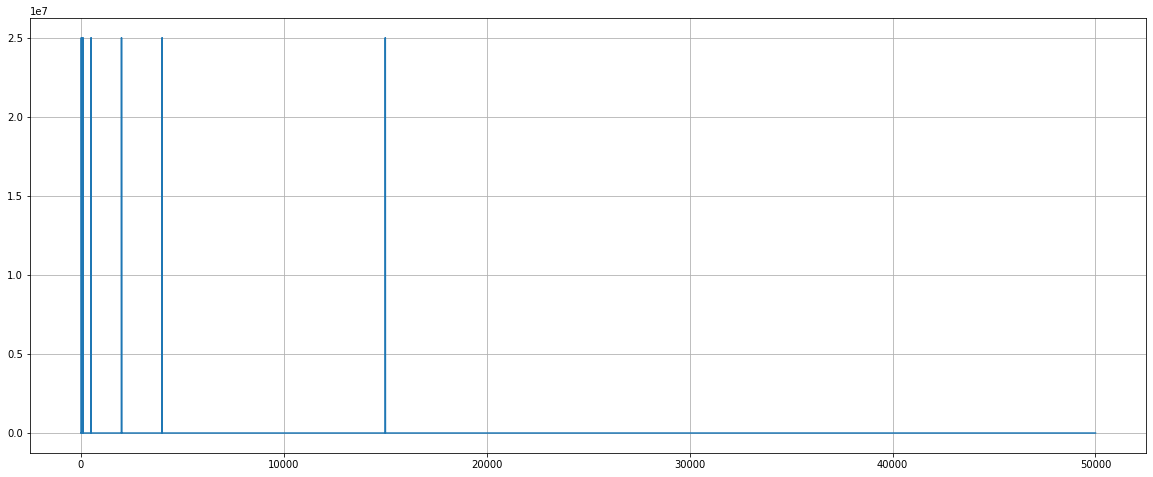

In [12]:
transform = fft(signal(x))
frq = fftfreq(N, 1/fs)
end_of_positive_frequencies = int(N // 2)
xf = frq[:end_of_positive_frequencies]

plt.figure(figsize=(20,8))
plt.plot(xf, np.abs(transform[:end_of_positive_frequencies]))
plt.grid()
plt.show()

In [13]:
def fft_bucket(left, right, fft_frq):
    indexes = []
    for idx,f in enumerate(fft_frq):
        if left <= f and f <= right:
            indexes.append(idx)
        if f > right:
            break
    return indexes

In [14]:
center, left, right = getansifrequencies(fraction=3)
positive_frequences = frq[:end_of_positive_frequencies]
print(positive_frequences)

buckets = list(map(lambda tp: fft_bucket(tp[0], tp[1], positive_frequences), zip(left, right)))

[0.00000e+00 2.00000e-01 4.00000e-01 ... 4.99994e+04 4.99996e+04
 4.99998e+04]


In [15]:
amplitudes = []
for b in buckets:
    amplitudes.append(sqrt(sum([pow(np.abs(transform[i]),2) for i in b])))

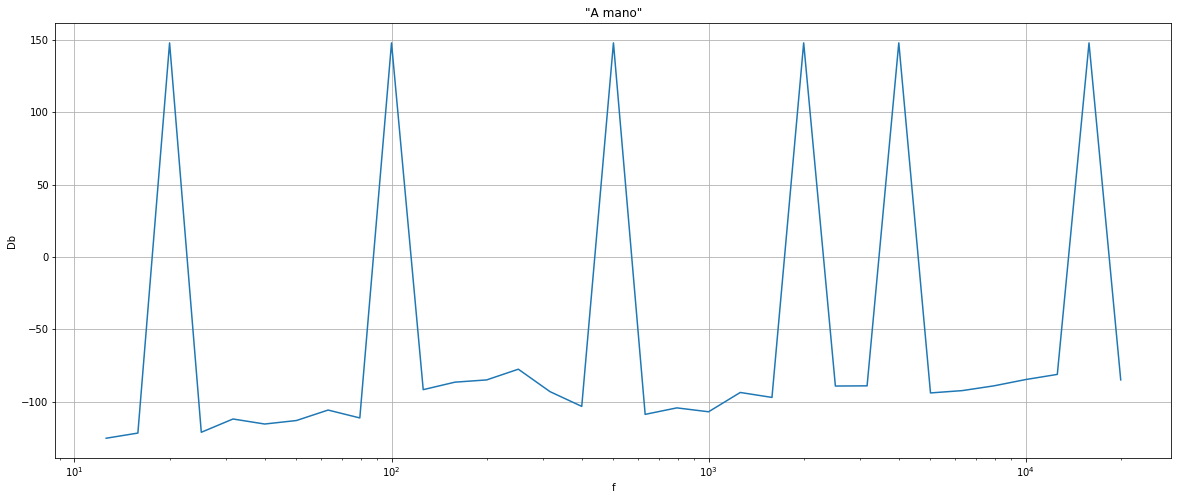

In [16]:
plt.figure(figsize=(20,8))

plt.xticks(np.linspace(0,20000,30))
plt.xscale('log')

plt.plot(center, 20*np.log10(amplitudes))

plt.grid()
plt.ylabel('Db')
plt.xlabel('f')
plt.title('"A mano"')

plt.show()